## Bootstrapping Chicago Salary Database 


In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings

In [2]:
chicago_df = pd.read_csv('data/ChicagoSalary.csv')


In [3]:
np.sum(chicago_df["Annual.Salary"] > 0)

25159

In [4]:
# I am going to take one sample of size 100 
# and I'm going to elevate it to exalted 
# status as "the sample."

thesample = chicago_df.sample(100, random_state=1)

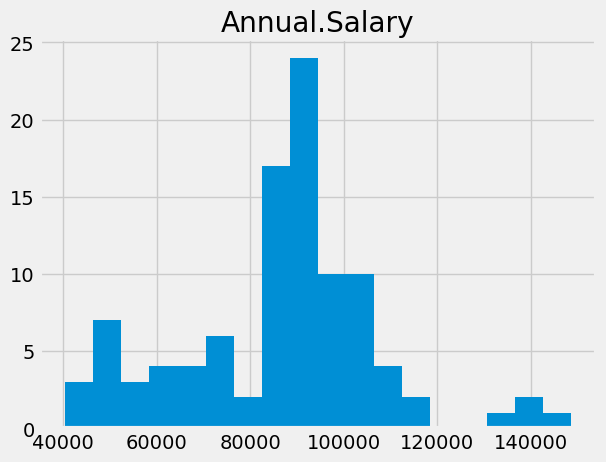

In [5]:
# Histogram of empirical distributions of our
# sample of 100

thesample.hist('Annual.Salary', bins = 18);

In [6]:
nsim=100
means = []
for i in range(nsim):
    means.append(np.mean(thesample.sample(100, replace=True)["Annual.Salary"]))

(array([ 3.,  6.,  9., 10., 15., 21., 23.,  5.,  4.,  4.]),
 array([81145.5  , 82108.482, 83071.464, 84034.446, 84997.428, 85960.41 ,
        86923.392, 87886.374, 88849.356, 89812.338, 90775.32 ]),
 <BarContainer object of 10 artists>)

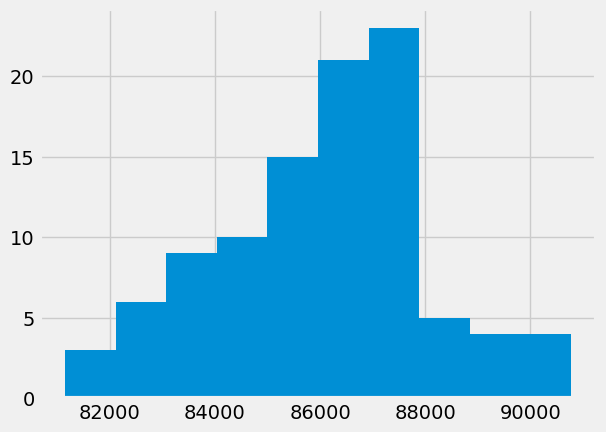

In [7]:
plt.hist(means)

In [8]:
nsim=10000
means = []
for i in range(nsim):
    means.append(np.mean(thesample.sample(100, replace=True)["Annual.Salary"]))


Text(0.5, 0, 'Salary, thousands of dollars')

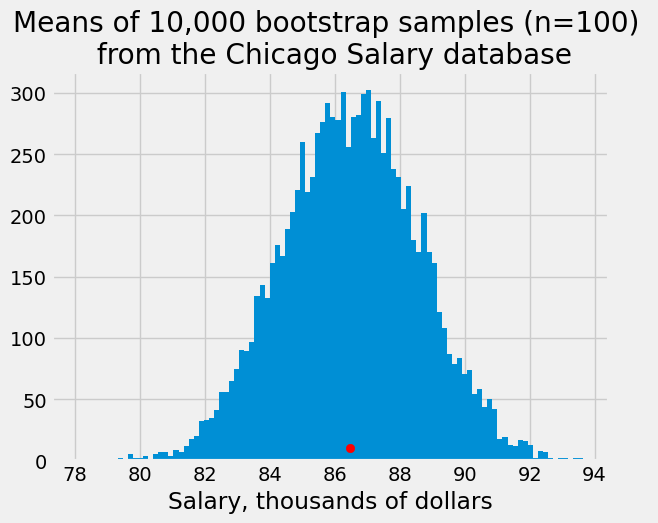

In [9]:
plt.hist(np.array(means)/1000, bins=100)
plt.scatter(np.mean(thesample["Annual.Salary"])/1000, 10, c='red')
plt.title("Means of 10,000 bootstrap samples (n=100) \n from the Chicago Salary database")
plt.xlabel("Salary, thousands of dollars")

Take note, that red dot is the mean of my n=100 sample.
My n=100 sample that might have been unlucky.

I am desperate to understand how my one n=100 sample generalizes.

The set of 10,000 mangled (by n=100 sampling with replacement) 
resamples of my golden sample are all slightly different.

The difference between my entire sample and the mean 
is like the difference between the entire sample and the
resamples.

Why?  The resamples have the same mean and variance as
the "big" sample, and are of the same size (!!!)

Text(0.5, 0, 'Salary, thousands of dollars')

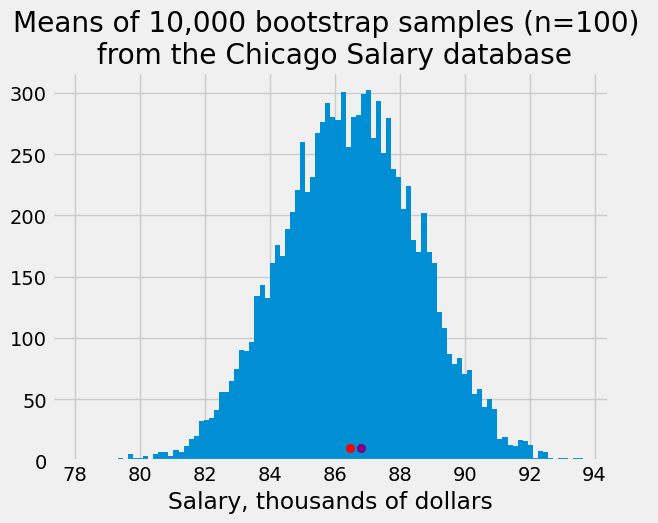

In [10]:
plt.hist(np.array(means)/1000, bins=100)
plt.scatter(np.mean(thesample["Annual.Salary"])/1000, 10, c='red', label="Sample mean (n=100)")
plt.scatter(np.mean(chicago_df["Annual.Salary"])/1000, 10, c='purple', label="Population mean (n=25159)")

plt.title("Means of 10,000 bootstrap samples (n=100) \n from the Chicago Salary database")
plt.xlabel("Salary, thousands of dollars")